# PROJECT DESCRIPTION

During the Coronavirus disease 2019-20 (COVID-19) outbreak in the United States, nursing homes became the hotbed for the spread of COVID-19. States developed different policies to mitigate the COVID-19 risks at nursing homes, including limiting nursing home visitation and mandating staff screening. The purpose of this study is to examine whether COVID-19 cases and deaths are related to the nursing home reported quality.We will determine U.S. nursing home characteristics that allow the prediction of COVID-19 cases and deaths including the development of a predictive model.

We have extracted the data from external data sets which were officially available online. 

The main independent variable is nursing home reported quality.
The independent variables include:
1. NURSING HOME REPORTED QUALITY
2. NURSING HOME OWNERSHIP
3. SIZE
4. YEARS OF OPERATION
5. PATIENT RACE AND COMPOSITION
 
The dependent variables for this project are:-
1. INFECTED NURSING HOMES: If a nursing home has at least one case of COVID-19 among staff and residents.
2. CONFIRMED RESIDENTS: Number of infections among residents.
3. CONFIRMED STAFF: Number of infections among the staff.
4. LARGE OUTBREAK: Among Nursing Homes with at least one Infection, show the number of infections among staff or residents greater than 95% percentile.

# IMPORTING THE NECESSARY MODULES

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# IMPORTING ALL THE NECESSARY DATAFRAMES

In [6]:
nh=pd.read_csv("NH_INFO.csv")

In [7]:
nh.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Ownership Type',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Overall Rating', 'Reported RN Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total Amount of Fines in Dollars', 'Facility age', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day', 'No fine',
       'Small fine (1-<Median)', 'Large fine (>=Median)',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies'],
      dty

In [8]:
cases=pd.read_csv("NH_COVID19_CASES.csv")

In [9]:
cases.columns

Index(['Federal Provider Number', 'Residents Total Confirmed COVID-19',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds', 'Staff Total Confirmed COVID-19',
       'Staff Total COVID-19 Deaths',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percentile)',
       'No Confirmed COVID-19 Deaths among residents',
       'Confirmed COVID-19 Deaths among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Deaths among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Deaths among staff',
       'Confirmed COVID-19 Deaths among staff (>0)',
       'Facility size Small (<33% Percentile beds)',
       'Facility si

In [10]:
res_data=pd.read_csv("RESIDENTS_DATA.csv")

In [11]:
res_data.columns

Index(['PROV', 'paymcaid', 'multifac', 'pctwhite_2011p',
       'Low Medicaid share (<Median)', 'High Medicaid share (>=Median)',
       'No chain affiliation', 'Chain affiliation',
       'Low racial or ethnic minority share (<Median)',
       'High racial or ethnic minority share (>=Median)'],
      dtype='object')

In [12]:
rur_urb=pd.read_csv("RURAL_URBAN_DATA.csv")

In [13]:
rur_urb.columns

Index(['FIPS State county code', 'CBSA (Blanks are Rural)', 'Rural area',
       'Urban area'],
      dtype='object')

In [14]:
county=pd.read_csv("ZIP_TO_COUNTY.csv")

In [15]:
county.columns

Index(['Zip', 'County Code'], dtype='object')

In [16]:
county_inf=pd.read_csv("PER_100K.csv")

In [17]:
county_inf.columns

Index(['countyFIPS', '7/19/20', '7/19/20.1', 'population',
       'County Infections per 100K', 'County Deaths per 100K',
       'County Infections per 100K below Median',
       'County Infections per 100K Median or higher',
       'County Deaths per 100K below Median',
       'County Deaths per 100K Median or higher'],
      dtype='object')

In [180]:
snf_data_path = "CA_DETAIL_TABLE_crosstab.csv"
nhc_data_path = "ProviderInfo_Download.csv"

In [185]:
snf = pd.read_csv(snf_data_path, encoding = "ISO-8859-1", error_bad_lines=False)
nhc = pd.read_csv(nhc_data_path, encoding = "ISO-8859-1", error_bad_lines=False)

In [187]:
snf.columns

Index(['County (copy)', 'FACILITY NAME', 'Facility Id', 'COUNTY',
       'TODAY POSITIVE RESIDENTS', 'CUMULATIVE POSITIVE RESIDENTS ',
       'COVID-RELATED RESIDENT DEATHS', 'TODAY POSITIVE HCW ',
       'CUMULATIVE POSITIVE HCW ', 'COVID-RELATED HCW DEATHS ', 'Record',
       'Record (copy)'],
      dtype='object')

In [188]:
nhc.columns

Index(['PROVNUM', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'PHONE',
       'COUNTY_SSA', 'County_name', 'OWNERSHIP', 'BEDCERT', 'RESTOT',
       'CERTIFICATION', 'INHOSP', 'LBN', 'PARTICIPATION_DATE', 'CCRC_FACIL',
       'SFFStatus', 'ABUSE_ICON', 'OldSurvey', 'CHOW_LAST_12MOS',
       'RESFAMCOUNCIL', 'SPRINKLER_STATUS', 'Overall_Rating',
       'overall_rating_fn', 'SURVEY_RATING', 'survey_rating_fn',
       'Quality_Rating', 'quality_rating_fn', 'LS_Quality_Rating',
       'LS_quality_rating_fn', 'SS_Quality_Rating', 'SS_quality_rating_fn',
       'Staffing_Rating', 'staffing_rating_fn', 'RN_staffing_rating',
       'RN_staffing_rating_fn', 'STAFFING_FLAG', 'PT_STAFFING_FLAG', 'AIDHRD',
       'VOCHRD', 'RNHRD', 'TOTLICHRD', 'TOTHRD', 'PTHRD', 'CM_AIDE', 'CM_LPN',
       'CM_RN', 'CM_TOTAL', 'ADJ_AIDE', 'ADJ_LPN', 'ADJ_RN', 'ADJ_TOTAL',
       'CYCLE_1_SURVEY_DATE', 'cycle_1_defs', 'cycle_1_NfromDefs',
       'cycle_1_NfromComp', 'cycle_1_defs_score', 'cycle_1_NumRevis',
    

#### Please Note that snf and nhc datasets have been imported solely for the purpose of answering question-3.

# COMBINING ALL THE NECESSARY DATA COLUMNS INTO FOUR MAIN DATAFRAMES 

In [18]:
df1=nh[['Federal Provider Number', 'Provider Zip Code','Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day','No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies']]

In [19]:
df2=cases[['Federal Provider Number','No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percentile)',
       'No Confirmed COVID-19 Deaths among residents',
       'Confirmed COVID-19 Deaths among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Deaths among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Deaths among staff',
       'Confirmed COVID-19 Deaths among staff (>0)',
       'Facility size Small (<33% Percentile beds)',
       'Facility size Medium (33%-66% Percentile beds)',
       'Facility size Large (>66% Percentile beds)',
       'Low occupancy rate (<33% Percentile)',
       'Medium occupancy rate (33%-66% Percentile)',
       'High occupancy rate (>66% Percentile)']]

In [20]:
df3=res_data[['PROV','Low Medicaid share (<Median)', 'High Medicaid share (>=Median)',
       'No chain affiliation', 'Chain affiliation',
       'Low racial or ethnic minority share (<Median)',
       'High racial or ethnic minority share (>=Median)']]

In [21]:
df3.columns=['Federal Provider Number','Low Medicaid share (<Median)', 'High Medicaid share (>=Median)',
       'No chain affiliation', 'Chain affiliation',
       'Low racial or ethnic minority share (<Median)',
       'High racial or ethnic minority share (>=Median)']

In [22]:
df=df1.merge(df2, on="Federal Provider Number", how='inner')

In [23]:
df_NH=df.merge(df3, on="Federal Provider Number", how='inner')

In [24]:
df_NH.head()

,Federal Provider Number,Provider Zip Code,Government,Non profit,For profit,Young (<33% Percentile),Medium (33%-66% Percentile),Old (>66% Percentile),4- or 5-Star Overall Rating,3-Star Overall Rating,...,Facility size Large (>66% Percentile beds),Low occupancy rate (<33% Percentile),Medium occupancy rate (33%-66% Percentile),High occupancy rate (>66% Percentile),Low Medicaid share (<Median),High Medicaid share (>=Median),No chain affiliation,Chain affiliation,Low racial or ethnic minority share (<Median),High racial or ethnic minority share (>=Median)
0,365333,43402,0,0,1,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,1
1,315254,7093,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
2,495309,23509,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,515181,26104,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
4,676108,77662,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1


In [25]:
df_NH.shape

(12747, 41)

In [26]:
df4=county[['Zip', 'County Code']]

In [27]:
df5=county_inf[['countyFIPS','County Infections per 100K', 'County Deaths per 100K','County Infections per 100K below Median',
       'County Infections per 100K Median or higher',
       'County Deaths per 100K below Median',
       'County Deaths per 100K Median or higher']]

In [28]:
df5.head()

,countyFIPS,County Infections per 100K,County Deaths per 100K,County Infections per 100K below Median,County Infections per 100K Median or higher,County Deaths per 100K below Median,County Deaths per 100K Median or higher
0,0,NaN,NaN,0,1,0,1
1,1001,1507.0,38.0,0,1,0,1
2,1003,868.0,7.0,0,1,0,1
3,1005,2005.0,12.0,0,1,0,1
4,1007,1201.0,9.0,0,1,0,1


In [29]:
df5.columns=['County Code','County Infections per 100K', 'County Deaths per 100K','County Infections per 100K below Median',
       'County Infections per 100K Median or higher',
       'County Deaths per 100K below Median',
       'County Deaths per 100K Median or higher']

In [30]:
df6=rur_urb[["FIPS State county code",'Rural area','Urban area']]

In [31]:
df6.columns=['County Code','Rural area','Urban area']

In [32]:
df_temp=df4.merge(df5, on="County Code", how='inner')

In [33]:
df_COUNTY=df_temp.merge(df6, on="County Code", how="inner")

In [34]:
df_COUNTY.head()

,Zip,County Code,County Infections per 100K,County Deaths per 100K,County Infections per 100K below Median,County Infections per 100K Median or higher,County Deaths per 100K below Median,County Deaths per 100K Median or higher,Rural area,Urban area
0,36091,1001,1507.0,38.0,0,1,0,1,1,0
1,36758,1001,1507.0,38.0,0,1,0,1,1,0
2,36006,1001,1507.0,38.0,0,1,0,1,1,0
3,36067,1001,1507.0,38.0,0,1,0,1,1,0
4,36701,1001,1507.0,38.0,0,1,0,1,1,0


In [35]:
df_COUNTY.shape

(54120, 10)

In [36]:
df7=nh[['Federal Provider Number','Reported Total Nurse Staffing Hours per Resident per Day','Overall Rating','Ownership Type']]

In [37]:
df8=cases[['Federal Provider Number', 'Residents Total Confirmed COVID-19',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds', 'Staff Total Confirmed COVID-19',
       'Staff Total COVID-19 Deaths']]

In [38]:
df9=res_data[['PROV', 'paymcaid','pctwhite_2011p']]

In [39]:
df9.columns=['Federal Provider Number', 'paymcaid','pctwhite_2011p']

In [40]:
df_temp=df7.merge(df8, on="Federal Provider Number", how="inner")

In [41]:
df_CONTINUOUS=df_temp.merge(df9, on='Federal Provider Number', how='inner')

In [42]:
df_CONTINUOUS.head()

,Federal Provider Number,Reported Total Nurse Staffing Hours per Resident per Day,Overall Rating,Ownership Type,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Staff Total Confirmed COVID-19,Staff Total COVID-19 Deaths,paymcaid,pctwhite_2011p
0,365333,3.45472,4,For profit - Corporation,0,0,92,88,1,0,66.67,98.77
1,315254,3.23607,5,For profit - Corporation,3,0,108,72,2,0,93.68,23.71
2,495309,3.17798,2,For profit - Partnership,2,0,60,48,6,0,75.47,48.08
3,515181,3.51293,4,For profit - Corporation,0,0,66,63,0,0,73.85,98.31
4,676108,3.72184,2,For profit - Limited Liability company,21,0,144,91,13,0,69.47,89.47


#### We have with us mainly 3 dataframes that we will be working with. Two binary dataframes : One being the nursing homes data set which will be used for questions 1 through 8 and the other county specific dataframe that will be used to answer county specific questions 9 and 10. There is one dataframe consisting of purely continuous data so that we can perform visualizations and carry out tests.

In [192]:
df_10 = snf[["FACILITY NAME", "CUMULATIVE POSITIVE RESIDENTS ", "CUMULATIVE POSITIVE HCW "]]
df_11 = nhc[["PROVNAME", "SURVEY_RATING","Quality_Rating"]]
df_11.columns = ["FACILITY NAME", "SELF_REPORTED","CMS_REPORTED"]
df_Q3 = df_11.merge(df_10, on=["FACILITY NAME"], how="inner")

#### This dataframe is solely for the purpose of solving question number 3

# EXPLORATORY DATA ANALYSIS (EDA)

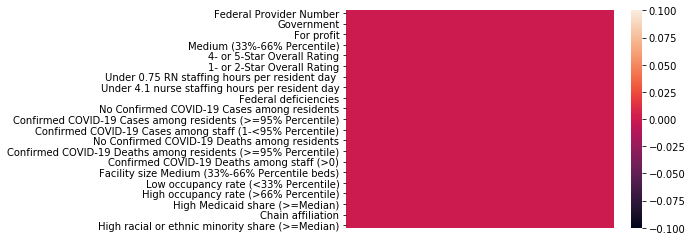

In [43]:
sns.heatmap(df_NH.isnull().T, xticklabels=False)

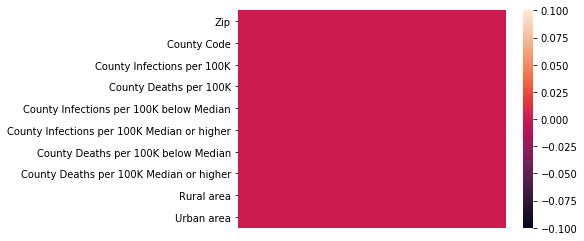

In [44]:
sns.heatmap(df_COUNTY.isnull().T, xticklabels=False)

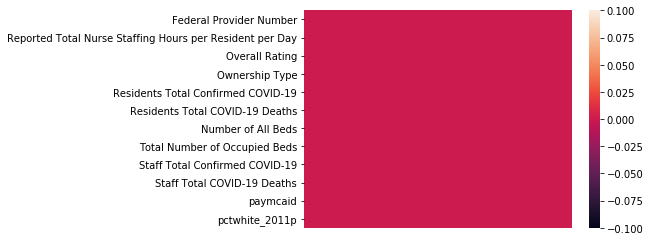

In [45]:
sns.heatmap(df_CONTINUOUS.isnull().T, xticklabels=False)

AS IS CLEAR, THERE ARE NO MISSING VALUES IN OUR 3 DATAFRAMES. NOW WE WILL CHECK FOR Nan VALUES BEING PRESENT

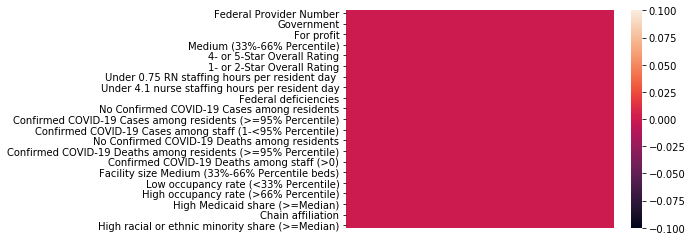

In [46]:
sns.heatmap(df_NH.isna().T, xticklabels=False)

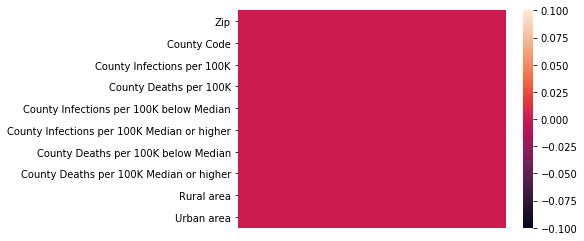

In [47]:
sns.heatmap(df_COUNTY.isna().T, xticklabels=False)

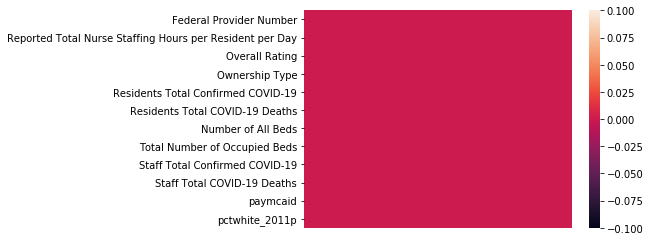

In [48]:
sns.heatmap(df_CONTINUOUS.isna().T, xticklabels=False)

Great, Our dataframes are devoid of any Nan values as well. Now we can proceed to doing EDA and visualizations as per each of the questions

### QUESTION 1

In [49]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [50]:
df_A=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths','Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths']]

In [51]:
df_B=df_NH[["Federal Provider Number",'Government','Non profit', 'For profit']]

In [52]:
df=df_A.merge(df_B, on="Federal Provider Number")

In [53]:
df.head()

,Federal Provider Number,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths,Staff Total Confirmed COVID-19,Staff Total COVID-19 Deaths,Government,Non profit,For profit
0,365333,0,0,1,0,0,0,1
1,315254,3,0,2,0,0,0,1
2,495309,2,0,6,0,0,0,1
3,515181,0,0,0,0,0,0,1
4,676108,21,0,13,0,0,0,1


[Text(0, 0.5, 'NUMBER OF EACH TYPE OF NHs'), Text(0.5, 0, 'OWNERSHIP')]

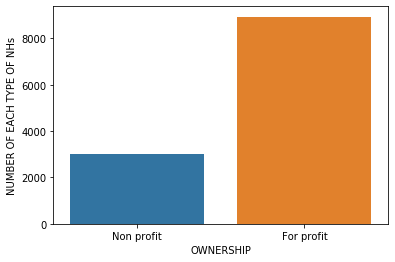

In [54]:
ax=sns.barplot(x=["Non profit", "For profit"],y=[df["Non profit"].sum(),df["For profit"].sum()])
ax.set(xlabel="OWNERSHIP", ylabel="NUMBER OF EACH TYPE OF NHs")

### RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19'), Text(0.5, 0, 'OWNERSHIP')]

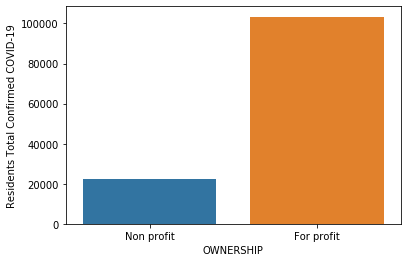

In [55]:
ax=sns.barplot(x=["Non profit", "For profit"],y=[df[df["Non profit"]==1]["Residents Total Confirmed COVID-19"].sum(),df[df["For profit"]==1]["Residents Total Confirmed COVID-19"].sum()])
ax.set(xlabel="OWNERSHIP", ylabel="Residents Total Confirmed COVID-19")

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH'),
 Text(0.5, 0, 'OWNERSHIP')]

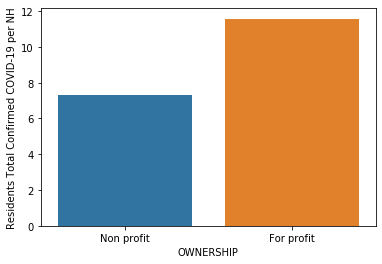

In [56]:
ax=sns.barplot(x=["Non profit", "For profit"],y=[df[df["Non profit"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Non profit"].sum(),df[df["For profit"]==1]["Residents Total Confirmed COVID-19"].sum()/df["For profit"].sum()])
ax.set(xlabel="OWNERSHIP", ylabel="Residents Total Confirmed COVID-19 per NH")

In [57]:
[NP,FP]=[df[df["Non profit"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Non profit"].sum(),df[df["For profit"]==1]["Residents Total Confirmed COVID-19"].sum()/df["For profit"].sum()]

In [58]:
percent=(FP-NP)*100/(NP+FP)
print("The percentage by which the Total Residents With Confirmed COVID-19 per NH in FPs is higher as compared to NFPs is:" + str(percent))

The percentage by which the Total Residents With Confirmed COVID-19 per NH in FPs is higher as compared to NFPs is:22.410121866223946


In [59]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array((df[df["Non profit"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Non profit"].sum(),df[df["For profit"]==1]["Residents Total Confirmed COVID-19"].sum()/df["For profit"].sum()))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.9497802880902444
Confidence Interval:(6.519088462541545, 12.392792056898672)
P-Value:0.32977522939027537


#### INFERENCE: The p value of the Chi-Squared Test for the Residents is quite big (p=0.329). This suggests that we can safely accept the null hypothesis as being true and reject the alternate hypothesis.  This is also reflected in the sharpness of the 95% Confidence Interval. This means that the number of cases per NH is somewhat close to the expected mean in both the NPs and the FPs. 

#### Looking at the trends visually using the bar plots, it is very clear that the average number of cases per NH is higher in the FPs by almost 22% in comparison to the NPs.

### HCW STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19'), Text(0.5, 0, 'OWNERSHIP')]

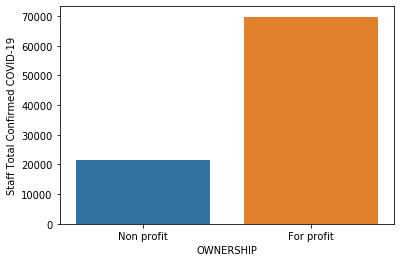

In [60]:
ax=sns.barplot(x=["Non profit", "For profit"],y=[df[df["Non profit"]==1]["Staff Total Confirmed COVID-19"].sum(),df[df["For profit"]==1]["Staff Total Confirmed COVID-19"].sum()])
ax.set(xlabel="OWNERSHIP", ylabel="Staff Total Confirmed COVID-19")

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH'),
 Text(0.5, 0, 'OWNERSHIP')]

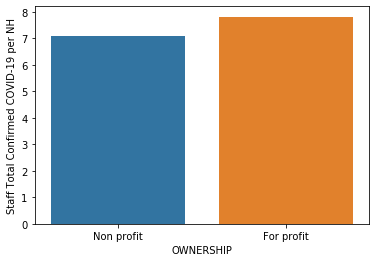

In [61]:
ax=sns.barplot(x=["Non profit", "For profit"],y=[df[df["Non profit"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Non profit"].sum(),df[df["For profit"]==1]["Staff Total Confirmed COVID-19"].sum()/df["For profit"].sum()])
ax.set(xlabel="OWNERSHIP", ylabel="Staff Total Confirmed COVID-19 per NH")

In [62]:
[NP,FP]=[df[df["Non profit"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Non profit"].sum(),df[df["For profit"]==1]["Staff Total Confirmed COVID-19"].sum()/df["For profit"].sum()]

In [63]:
percent=(FP-NP)*100/(NP+FP)
print("The percentage by which the Total Staff With Confirmed COVID-19 per NH in FPs is higher as compared to NFPs is:" + str(percent))

The percentage by which the Total Staff With Confirmed COVID-19 per NH in FPs is higher as compared to NFPs is:4.86295830336438


In [64]:
#CHI SQUARED TEST FOR STAFF
Staff=np.array((df[df["Non profit"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Non profit"].sum(),df[df["For profit"]==1]["Staff Total Confirmed COVID-19"].sum()/df["For profit"].sum()))
mean=np.mean(Staff)
sigma=np.std(Staff)
chisq,p=stats.chisquare(Staff)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Staff)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.0352346709705116
Confidence Interval:(6.947626160258009, 7.951785813733773)
P-Value:0.8511047699233885


#### INFERENCE: The p value of the Chi-Squared Test for the Staff members is extremely large (p=0.851). This suggests that we can safely accept the null hypothesis as being true and reject the alternate hypothesis.  This is also reflected in the acute sharpness of the 95% Confidence Interval. This means that the number of cases per NH is very close to the expected mean in both the NPs and the FPs. 

#### Looking at the trends visually using the bar plots, it is very clear that the average number of cases per NH is higher in the FPs by a slight margin of 4.86% in comparison to the NPs.

### QUESTION 2

In [65]:
df=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Staff Total Confirmed COVID-19', 'Overall Rating']]

In [66]:
df.head()

,Federal Provider Number,Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19,Overall Rating
0,365333,0,1,4
1,315254,3,2,5
2,495309,2,6,2
3,515181,0,0,4
4,676108,21,13,2


In [67]:
df.groupby("Overall Rating")["Federal Provider Number"].count()

Overall Rating
1    1942
2    2510
3    2321
4    2789
5    3185
Name: Federal Provider Number, dtype: int64

[Text(0, 0.5, 'Number of NHs by Rating')]

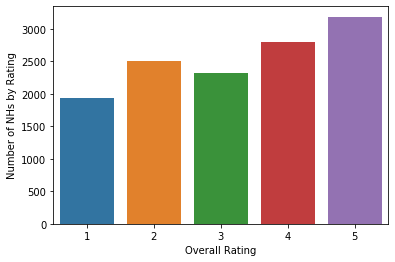

In [68]:
ax=sns.barplot(x=df.groupby("Overall Rating")["Federal Provider Number"].count().index, y=df.groupby("Overall Rating")["Federal Provider Number"].count())
ax.set(ylabel="Number of NHs by Rating")

### RESIDENTS

In [69]:
Res=df.groupby("Overall Rating")["Residents Total Confirmed COVID-19"].sum()/df.groupby("Overall Rating")["Residents Total Confirmed COVID-19"].count()

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

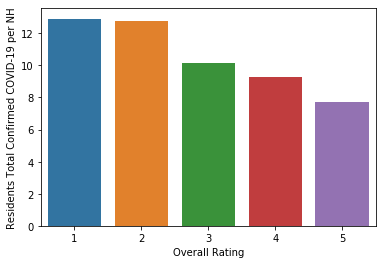

In [70]:
ax=sns.barplot(x=Res.index, y=Res)
ax.set(ylabel="Residents Total Confirmed COVID-19 per NH")

In [71]:
#Chi-Squared Test for Residents
Res=np.array((df.groupby("Overall Rating")["Residents Total Confirmed COVID-19"].sum()/df.groupby("Overall Rating")["Residents Total Confirmed COVID-19"].count()))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 1.890098306936185
Confidence Interval:(8.817624207145855, 12.321764569885886)
P-Value:0.7559637112013953


#### INFERENCE: The p value of the Chi-Squared Test for the Residents is quite large (p=0.755). This suggests that we can safely accept the null hypothesis as being true and reject the alternate hypothesis.  This is also reflected in the sharpness of the 95% Confidence Interval. This means that the number of cases per NH is very close to the expected mean in the NHs across all the Overall Ratings. 

#### Looking at the trends visually using the bar plots, it is very clear that the average number of cases per NH the least in 5-star NHs. The trend is consistent, showing that higher the rating lower is the average number of cases per NH.

### HCW STAFF

In [72]:
Hcw=df.groupby("Overall Rating")["Staff Total Confirmed COVID-19"].sum()/df.groupby("Overall Rating")["Staff Total Confirmed COVID-19"].count()

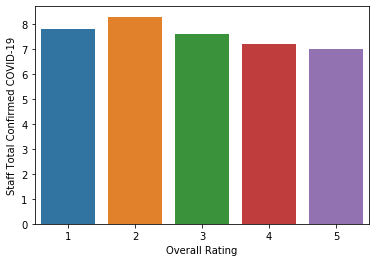

In [73]:
sns.barplot(x=Hcw.index, y=Hcw)

In [74]:
#Chi Squared Test for Hcw
Hcw=np.array((df.groupby("Overall Rating")["Staff Total Confirmed COVID-19"].sum()/df.groupby("Overall Rating")["Staff Total Confirmed COVID-19"].count()))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.1363819342564082
Confidence Interval:(7.180500175987667, 7.97756452699414)
P-Value:0.9977780378187658


#### INFERENCE: The p value of the Chi-Squared Test for the Staff members is extremely large (p=0.997). This suggests that we can safely accept the null hypothesis as being true and reject the alternate hypothesis.  This is also reflected in the acute sharpness of the 95% Confidence Interval. This means that the number of cases per NH is very close to the expected mean in the NHs across all the Overall Ratings. 

#### Looking at the trends visually using the bar plots, it is very clear that the average number of cases per NH the least in 5-star NHs. There is a small increase from 1-star to 2-star but otherwise the trend is consistent, showing that higher the rating lower is the average number of cases per NH.

### QUESTION 3

In [194]:
df=df_Q3

In [196]:
df.head()

,FACILITY NAME,SELF_REPORTED,CMS_REPORTED,CUMULATIVE POSITIVE RESIDENTS,CUMULATIVE POSITIVE HCW
0,REDLANDS HEALTHCARE CENTER,3.0,5.0,59,39
1,COUNTRY MANOR HEALTHCARE,3.0,5.0,66,30
2,EISENBERG VILLAGE,3.0,4.0,21,29
3,FAIRFIELD POST-ACUTE REHAB,4.0,5.0,0,0
4,MOUNT SAN ANTONIO GARDENS,3.0,5.0,<11,<11


In [197]:
df.loc[df["CUMULATIVE POSITIVE RESIDENTS "] == "<11", "CUMULATIVE POSITIVE RESIDENTS "] = "11"
df["CUMULATIVE POSITIVE RESIDENTS "] = df["CUMULATIVE POSITIVE RESIDENTS "].astype(int)

df.loc[df["CUMULATIVE POSITIVE HCW "] == "<11", "CUMULATIVE POSITIVE HCW "] = "11"
df["CUMULATIVE POSITIVE HCW "] = df["CUMULATIVE POSITIVE HCW "].astype(int)

In [198]:
df.dropna(inplace=True)

In [199]:
df.groupby("CMS_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].count()

CMS_REPORTED
1.0     16
2.0     39
3.0    117
4.0    218
5.0    609
Name: CUMULATIVE POSITIVE RESIDENTS , dtype: int64

In [201]:
df.groupby("SELF_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].count()

SELF_REPORTED
1.0    203
2.0    238
3.0    228
4.0    231
5.0     99
Name: CUMULATIVE POSITIVE RESIDENTS , dtype: int64

In [204]:
#Performing the T-Test to check whether the 2 survey ratings are consistent
#NULL-HYPOTHESIS, H0: BOTH THE RATINGS ARE SIMILAR
#ALTERNATE HYPOTHESIS H1: THERE IS SIGNIFICANT DISCREPANCY BETWEEN THE TWO RATINGS

tstatistic,p_value=stats.ttest_ind(df.SELF_REPORTED,df.CMS_REPORTED,equal_var=False)
print('t-statistic: '+str(tstatistic))
print('p-value: '+str(p_value))

t-statistic: -31.442139612861396
p-value: 5.155424742253472e-174


#### INFERENCE: The extremely small value of p-value tells us that we can reject the Null Hypothesis and accept the Alternate Hypothesis.

#### The amount of discrepancy between SELF_REPORTD and CMS_REPORTED RATINGS is very significant.

### RESIDENTS

In [206]:
Res_SELF=df.groupby("SELF_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].sum()/df.groupby("SELF_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].count()
Res_CMS=df.groupby("CMS_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].sum()/df.groupby("CMS_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].count()

[Text(0, 0.5, 'CUMULATIVE POSITIVE RESIDENTS PER NH')]

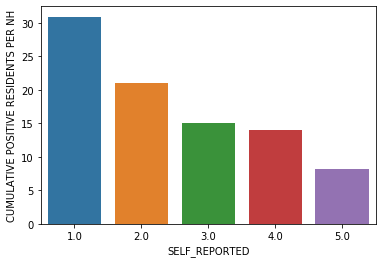

In [210]:
ax=sns.barplot(x=Res_SELF.index,y=Res_SELF)
ax.set(ylabel='CUMULATIVE POSITIVE RESIDENTS PER NH')

[Text(0, 0.5, 'CUMULATIVE POSITIVE RESIDENTS PER NH')]

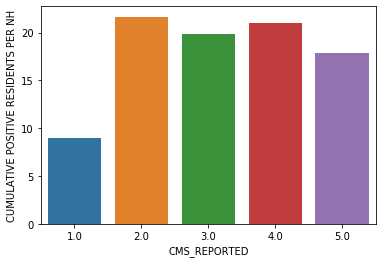

In [211]:
ax=sns.barplot(x=Res_CMS.index,y=Res_CMS)
ax.set(ylabel='CUMULATIVE POSITIVE RESIDENTS PER NH')

#### INFERENCE: The bar plots suggest that it is visually very clear that there is a vast difference between the trend of cases per NH based on the two Ratings. 

In [212]:
#CHI SQUARED TEST FOR RESIDENTS
Res_Self=np.array((df.groupby("SELF_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].sum()/df.groupby("SELF_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].count()))
mean=np.mean(Res_Self)
sigma=np.std(Res_Self)
chisq,p=stats.chisquare(Res_Self)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res_Self)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 16.634705562986134
Confidence Interval:(11.092264848692462, 24.600197960552666)
P-Value:0.002275684871508665


In [ ]:
#### INFERENCE: The extremely small value of p-value (p<0.05) suggests that the there is a vast difference between the values and the expected values. This is also  

In [213]:
Res_CMS=np.array((df.groupby("CMS_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].sum()/df.groupby("CMS_REPORTED")["CUMULATIVE POSITIVE RESIDENTS "].count()))
mean=np.mean(Res_CMS)
sigma=np.std(Res_CMS)
chisq,p=stats.chisquare(Res_CMS)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res_CMS)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 6.035279758479803
Confidence Interval:(13.794604317650435, 21.935219486967735)
P-Value:0.19652900631484535


### QUESTION 4

In [75]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [76]:
df_A=df_NH[['Federal Provider Number','No federal deficiencies', 'Federal deficiencies','Serious federal deficiencies']]

In [77]:
df_B=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Staff Total Confirmed COVID-19']]

In [78]:
df=df_A.merge(df_B, on="Federal Provider Number", how='inner')

In [79]:
df.head()

,Federal Provider Number,No federal deficiencies,Federal deficiencies,Serious federal deficiencies,Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19
0,365333,0,19,0,0,1
1,315254,0,5,0,3,2
2,495309,0,33,2,2,6
3,515181,0,29,2,0,0
4,676108,0,28,0,21,13


In [80]:
df["No federal deficiencies"].unique()

array([0, 1], dtype=int64)

### RESIDENTS

In [81]:
No_fed=df.groupby('No federal deficiencies')['Residents Total Confirmed COVID-19'].sum()/df.groupby('No federal deficiencies')['Residents Total Confirmed COVID-19'].count()

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

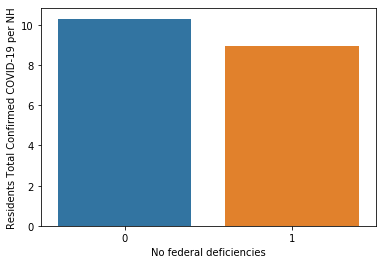

In [82]:
ax=sns.barplot(x=No_fed.index, y=No_fed)
ax.set(ylabel='Residents Total Confirmed COVID-19 per NH')

#### INFERENCE: The bar plot shows that the mean of the number of COVID Residents is higher in NHs having Federal Deficiencies as compared to those not having these deficiencies.

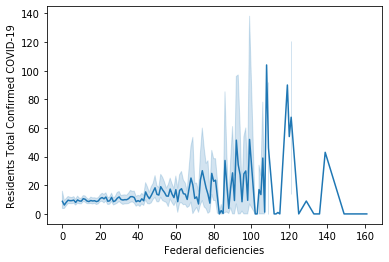

In [83]:
sns.lineplot(x=df['Federal deficiencies'], y=df['Residents Total Confirmed COVID-19'])

#### INFERENCE: The number of Residents' cases increases almost regularly as the number federal deficiencies at a NH increases. The drop in the tail of the graph is a result of smaller size of sample data with federal deficiencies as high as that. 

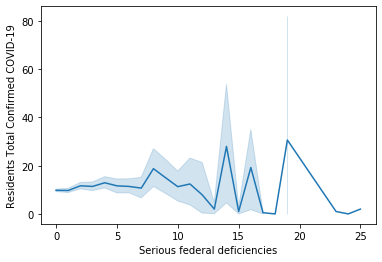

In [84]:
sns.lineplot(x=df['Serious federal deficiencies'], y=df['Residents Total Confirmed COVID-19'])

#### INFERENCE: The number of Residents' cases shows a slightly irregular trend but what we can see invariably is that huge spikes are visible when the number of serious deficiencies is very high.

### HCW STAFF

In [85]:
No_fed=df.groupby('No federal deficiencies')['Staff Total Confirmed COVID-19'].sum()/df.groupby('No federal deficiencies')['Staff Total Confirmed COVID-19'].count()

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH')]

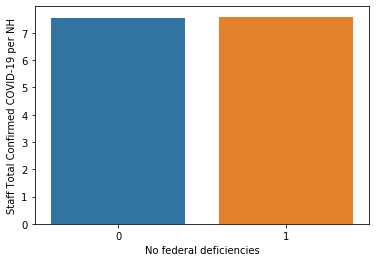

In [86]:
ax=sns.barplot(x=No_fed.index, y=No_fed)
ax.set(ylabel='Staff Total Confirmed COVID-19 per NH')

In [87]:
No_fed

No federal deficiencies
0    7.530191
1    7.590164
Name: Staff Total Confirmed COVID-19, dtype: float64

#### INFERENCE: The mean number of Staff cases in NHs with no deficiencies is lower here as well, though very very marginally.

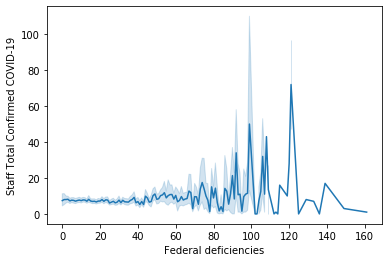

In [88]:
sns.lineplot(x=df['Federal deficiencies'], y=df['Staff Total Confirmed COVID-19'])

#### INFERENCE: The number of Staffs' cases increases almost regularly as the number federal deficiencies at an NH increases. The drop in the tail of the graph is a result of smaller size of sample data with federal deficiencies as high as that. 

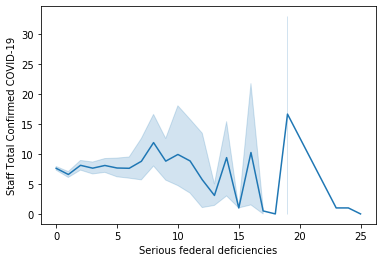

In [89]:
sns.lineplot(x=df['Serious federal deficiencies'], y=df['Staff Total Confirmed COVID-19'])

#### INFERENCE: The number of Staffs' cases varies quite irregularly as the number serious federal deficiencies at an NH increases. But we do see the maxima occurring at NHs where the number of serious deficiencies is extremely high.

### QUESTION 5

In [90]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [91]:
df_CONTINUOUS.columns

Index(['Federal Provider Number',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Overall Rating', 'Ownership Type',
       'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths',
       'Number of All Beds', 'Total Number of Occupied Beds',
       'Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths',
       'paymcaid', 'pctwhite_2011p'],
      dtype='object')

In [92]:
df_A=df_NH[['Federal Provider Number','No chain affiliation','Chain affiliation']]

In [93]:
df_B=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Staff Total Confirmed COVID-19']]

In [94]:
df=df_A.merge(df_B, on="Federal Provider Number", how='inner')

In [95]:
df.head()

,Federal Provider Number,No chain affiliation,Chain affiliation,Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19
0,365333,0,1,0,1
1,315254,1,0,3,2
2,495309,0,1,2,6
3,515181,1,0,0,0
4,676108,0,1,21,13


[Text(0, 0.5, 'NUMBER OF EACH TYPE OF NHs')]

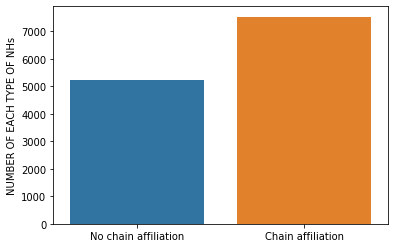

In [96]:
ax=sns.barplot(x=["No chain affiliation", "Chain affiliation"],y=[df["No chain affiliation"].sum(),df["Chain affiliation"].sum()])
ax.set(ylabel="NUMBER OF EACH TYPE OF NHs")

### RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

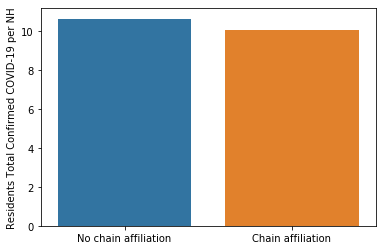

In [97]:
ax=sns.barplot(x=["No chain affiliation", "Chain affiliation"],y=[df[df["No chain affiliation"]==1]["Residents Total Confirmed COVID-19"].sum()/df["No chain affiliation"].sum(),df[df["Chain affiliation"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Chain affiliation"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 per NH")

In [98]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array(([df[df["No chain affiliation"]==1]["Residents Total Confirmed COVID-19"].sum()/df["No chain affiliation"].sum(),df[df["Chain affiliation"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Chain affiliation"].sum()]))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.017347006739037923
Confidence Interval:(9.933507259938459, 10.763938626427365)
P-Value:0.8952152291106887


In [99]:
[Non_Chain,Chain]=[df[df["No chain affiliation"]==1]["Residents Total Confirmed COVID-19"].sum()/df["No chain affiliation"].sum(),df[df["Chain affiliation"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Chain affiliation"].sum()]
percent=(Non_Chain-Chain)*100/(Non_Chain+Chain)
print("A Resident in Non-Chain NH has a higher chance of contracting the virus by: "+str(percent)+ "%")

A Resident in Non-Chain NH has a higher chance of contracting the virus by: 2.8950355141689417%


#### INFERENCE: The p-value of the residents' data is quite big suggesting that the means of the two data are very close to the expected hich is why we can accept the null hypothesis and reject the alternate hypothesis. This is also confirmed by the sharpness of the 95% CI.

#### The bar graphs very clearly show that the outbreak is smaller in NHs which are Chain-affiliated

### HCW STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH')]

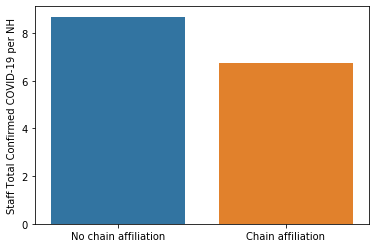

In [100]:
ax=sns.barplot(x=["No chain affiliation", "Chain affiliation"],y=[df[df["No chain affiliation"]==1]["Staff Total Confirmed COVID-19"].sum()/df["No chain affiliation"].sum(),df[df["Chain affiliation"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Chain affiliation"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 per NH")

In [101]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["No chain affiliation"]==1]["Staff Total Confirmed COVID-19"].sum()/df["No chain affiliation"].sum(),df[df["Chain affiliation"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Chain affiliation"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.24770143292058286
Confidence Interval:(6.353962244563607, 9.062191116309197)
P-Value:0.6186982396800763


In [102]:
[Non_Chain,Chain]=[df[df["No chain affiliation"]==1]["Staff Total Confirmed COVID-19"].sum()/df["No chain affiliation"].sum(),df[df["Chain affiliation"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Chain affiliation"].sum()]
percent=(Non_Chain-Chain)*100/(Non_Chain+Chain)
print("A Staff in Non-Chain NH has a higher chance of contracting the virus by: "+str(percent)+ "%")

A Staff in Non-Chain NH has a higher chance of contracting the virus by: 12.67582539876931%


#### INFERENCE: The p-value of the staff data is large suggesting that the means of the two data are very close to the expected hich is why we can accept the null hypothesis and reject the alternate hypothesis. This is also confirmed by the sharpness of the 95% CI.

#### The bar graphs very clearly show that the outbreak is smaller in NHs which are Chain-affiliated

### QUESTION 6

In [103]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [104]:
df_CONTINUOUS.columns

Index(['Federal Provider Number',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Overall Rating', 'Ownership Type',
       'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths',
       'Number of All Beds', 'Total Number of Occupied Beds',
       'Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths',
       'paymcaid', 'pctwhite_2011p'],
      dtype='object')

In [105]:
df_A=df_NH[['Federal Provider Number','Low occupancy rate (<33% Percentile)','Medium occupancy rate (33%-66% Percentile)','High occupancy rate (>66% Percentile)']]

In [106]:
df_B=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Staff Total Confirmed COVID-19']]

In [107]:
df=df_A.merge(df_B, on="Federal Provider Number", how='inner')

In [108]:
df.head()

,Federal Provider Number,Low occupancy rate (<33% Percentile),Medium occupancy rate (33%-66% Percentile),High occupancy rate (>66% Percentile),Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19
0,365333,0,0,1,0,1
1,315254,0,1,0,3,2
2,495309,1,0,0,2,6
3,515181,0,1,0,0,0
4,676108,0,0,1,21,13


[Text(0, 0.5, 'NUMBER OF EACH TYPE OF NHs')]

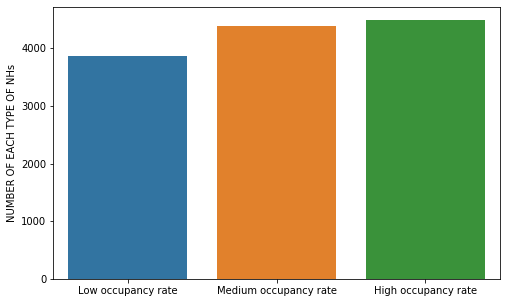

In [109]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=["Low occupancy rate", "Medium occupancy rate", "High occupancy rate"],y=[df["Low occupancy rate (<33% Percentile)"].sum(),df["Medium occupancy rate (33%-66% Percentile)"].sum(),df["High occupancy rate (>66% Percentile)"].sum()])
ax.set(ylabel="NUMBER OF EACH TYPE OF NHs")

### RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

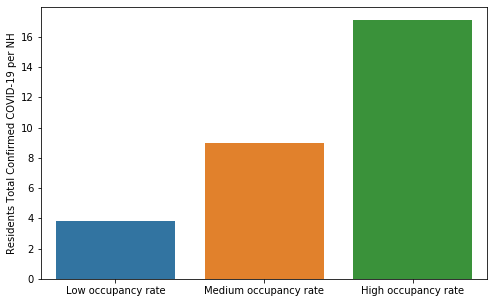

In [110]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=["Low occupancy rate", "Medium occupancy rate", "High occupancy rate"],y=[df[df["Low occupancy rate (<33% Percentile)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Low occupancy rate (<33% Percentile)"].sum(),df[df["Medium occupancy rate (33%-66% Percentile)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Medium occupancy rate (33%-66% Percentile)"].sum(),df[df["High occupancy rate (>66% Percentile)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["High occupancy rate (>66% Percentile)"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 per NH")

In [111]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array(([df[df["Low occupancy rate (<33% Percentile)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Low occupancy rate (<33% Percentile)"].sum(),df[df["Medium occupancy rate (33%-66% Percentile)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Medium occupancy rate (33%-66% Percentile)"].sum(),df[df["High occupancy rate (>66% Percentile)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["High occupancy rate (>66% Percentile)"].sum()]))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 8.984982366979288
Confidence Interval:(3.794586119773995, 16.168797267226292)
P-Value:0.011192725915723782


#### INFERENCE: The p-value of the Residents' data is really small, p=0.011 which is smaller than 0.05. Hence we have reject our null hypothesis and accept the alternate hypothesis stating that the values are quite afar from their expected values. Their means are not very close and actually very different from each other. The 95% CI is also very wide, which further approves of this fact.

#### Graphically too, we can see the trend very clearly. There is significant increase in the outbreak as the occupancy rate of beds in the NHs increase. 

### HCW STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH')]

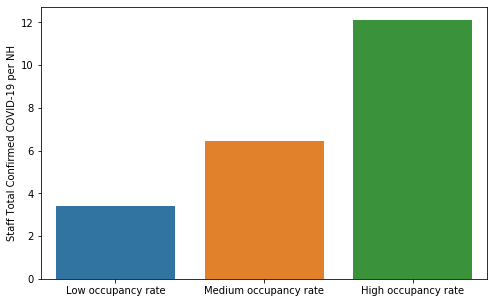

In [112]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=["Low occupancy rate", "Medium occupancy rate", "High occupancy rate"],y=[df[df["Low occupancy rate (<33% Percentile)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Low occupancy rate (<33% Percentile)"].sum(),df[df["Medium occupancy rate (33%-66% Percentile)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Medium occupancy rate (33%-66% Percentile)"].sum(),df[df["High occupancy rate (>66% Percentile)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["High occupancy rate (>66% Percentile)"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 per NH")

In [113]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["Low occupancy rate (<33% Percentile)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Low occupancy rate (<33% Percentile)"].sum(),df[df["Medium occupancy rate (33%-66% Percentile)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Medium occupancy rate (33%-66% Percentile)"].sum(),df[df["High occupancy rate (>66% Percentile)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["High occupancy rate (>66% Percentile)"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 5.3173574489467725
Confidence Interval:(3.2509604911037053, 11.408228569368926)
P-Value:0.07004070370179569


#### INFERENCE: The p-value of the Staff data is very small, p=0.070 but is greater than 0.05. Hence we have accept our null hypothesis and reject the alternate hypothesis stating that the values are close enough to their expected values.  The 95% CI is also not so wide, which further approves of this fact.

#### Graphically  we can see the trend very clearly. There is significant increase in the outbreak as the occupancy rate of beds in the NHs increase, though this increase is smaller than that observed among the Residents. 

### QUESTION 7

In [114]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [115]:
df_CONTINUOUS.columns

Index(['Federal Provider Number',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Overall Rating', 'Ownership Type',
       'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths',
       'Number of All Beds', 'Total Number of Occupied Beds',
       'Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths',
       'paymcaid', 'pctwhite_2011p'],
      dtype='object')

In [116]:
df_A=df_NH[['Federal Provider Number','4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day']]

In [117]:
df_B=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Staff Total Confirmed COVID-19']]

In [118]:
df=df_A.merge(df_B, on="Federal Provider Number", how='inner')

In [119]:
df.head()

,Federal Provider Number,4.1 nurse staffing hours per resident day or higher,Under 4.1 nurse staffing hours per resident day,Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19
0,365333,0,1,0,1
1,315254,0,1,3,2
2,495309,0,1,2,6
3,515181,0,1,0,0
4,676108,0,1,21,13


[Text(0, 0.5, 'NUMBER OF EACH TYPE OF NHs')]

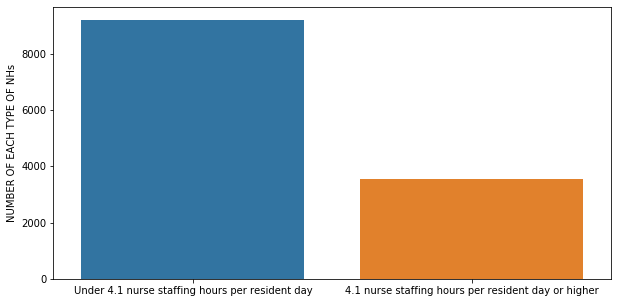

In [120]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Under 4.1 nurse staffing hours per resident day", "4.1 nurse staffing hours per resident day or higher"],y=[df["Under 4.1 nurse staffing hours per resident day"].sum(),df["4.1 nurse staffing hours per resident day or higher"].sum()])
ax.set(ylabel="NUMBER OF EACH TYPE OF NHs")

### RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

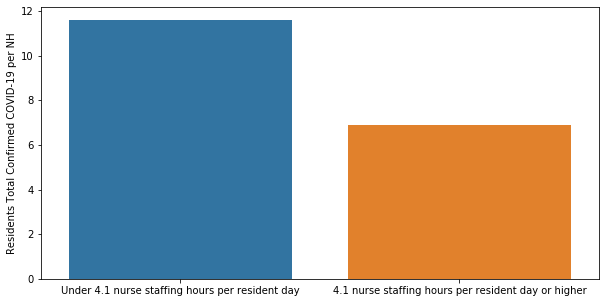

In [121]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Under 4.1 nurse staffing hours per resident day", "4.1 nurse staffing hours per resident day or higher"],y=[df[df["Under 4.1 nurse staffing hours per resident day"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Under 4.1 nurse staffing hours per resident day"].sum(),df[df["4.1 nurse staffing hours per resident day or higher"]==1]["Residents Total Confirmed COVID-19"].sum()/df["4.1 nurse staffing hours per resident day or higher"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 per NH")

In [122]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array(([df[df["Under 4.1 nurse staffing hours per resident day"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Under 4.1 nurse staffing hours per resident day"].sum(),df[df["4.1 nurse staffing hours per resident day or higher"]==1]["Residents Total Confirmed COVID-19"].sum()/df["4.1 nurse staffing hours per resident day or higher"].sum()]))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 1.1880728723445033
Confidence Interval:(6.005255417590984, 12.504356461206196)
P-Value:0.27571862568016825


#### INFERENCE: The p value of the Residents data is significant(p=0.275) meaning that we can accept the null Hypothesis and say that the values are actually close to the expected values. This is also reflected in the close 95% CI.

#### Graphically the trend is very clear. The outbreak is clearly bigger at NHs where the Staffing hours per Resident is lower than at the NHs where the Nursing hours are higher.

### HCW STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH')]

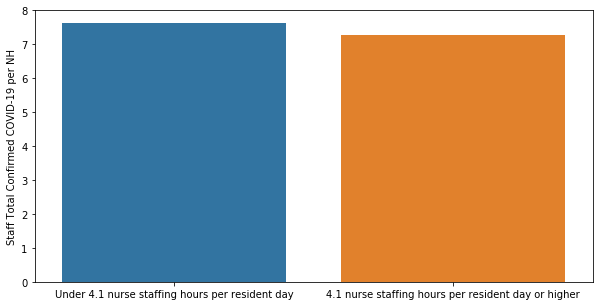

In [123]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Under 4.1 nurse staffing hours per resident day", "4.1 nurse staffing hours per resident day or higher"],y=[df[df["Under 4.1 nurse staffing hours per resident day"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Under 4.1 nurse staffing hours per resident day"].sum(),df[df["4.1 nurse staffing hours per resident day or higher"]==1]["Staff Total Confirmed COVID-19"].sum()/df["4.1 nurse staffing hours per resident day or higher"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 per NH")

In [124]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["Under 4.1 nurse staffing hours per resident day"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Under 4.1 nurse staffing hours per resident day"].sum(),df[df["4.1 nurse staffing hours per resident day or higher"]==1]["Staff Total Confirmed COVID-19"].sum()/df["4.1 nurse staffing hours per resident day or higher"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.007943677958783627
Confidence Interval:(7.215729667849944, 7.6926648343709605)
P-Value:0.9289807309724348


#### INFERENCE: The p value of the Staff data is very big(p=0.928) meaning that we can accept the null Hypothesis and say that the values are actually very close to the expected values. This is also reflected in the very narrow 95% CI.

#### Graphically the trend is very clear. The outbreak is clearly bigger at NHs where the Staffing hours per Resident is marginally lower than at the NHs where the Nursing hours are higher.

### QUESTION 8

In [125]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [126]:
df_CONTINUOUS.columns

Index(['Federal Provider Number',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Overall Rating', 'Ownership Type',
       'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths',
       'Number of All Beds', 'Total Number of Occupied Beds',
       'Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths',
       'paymcaid', 'pctwhite_2011p'],
      dtype='object')

In [127]:
df_A=df_NH[['Federal Provider Number','Low Medicaid share (<Median)',
       'High Medicaid share (>=Median)','Low racial or ethnic minority share (<Median)',
       'High racial or ethnic minority share (>=Median)']]

In [128]:
df_B=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Residents Total COVID-19 Deaths','Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths']]

In [129]:
df=df_A.merge(df_B, on='Federal Provider Number', how='inner')

In [130]:
df.head()

,Federal Provider Number,Low Medicaid share (<Median),High Medicaid share (>=Median),Low racial or ethnic minority share (<Median),High racial or ethnic minority share (>=Median),Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths,Staff Total Confirmed COVID-19,Staff Total COVID-19 Deaths
0,365333,0,1,0,1,0,0,1,0
1,315254,0,1,1,0,3,0,2,0
2,495309,0,1,1,0,2,0,6,0
3,515181,0,1,0,1,0,0,0,0
4,676108,0,1,0,1,21,0,13,0


### 1.MEDICAID

[Text(0, 0.5, 'NUMBER OF EACH TYPE OF NHs')]

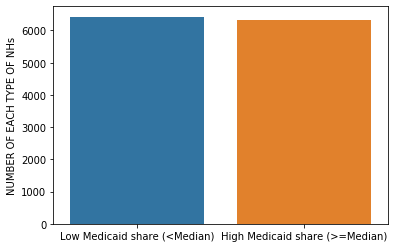

In [131]:
ax=sns.barplot(x=["Low Medicaid share (<Median)", "High Medicaid share (>=Median)"],y=[df["Low Medicaid share (<Median)"].sum(),df["High Medicaid share (>=Median)"].sum()])
ax.set(ylabel="NUMBER OF EACH TYPE OF NHs")

### CASES: RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

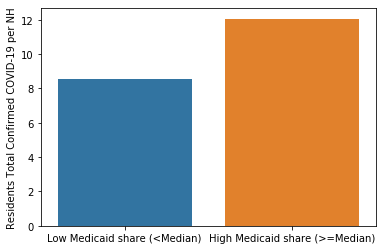

In [132]:
ax=sns.barplot(x=["Low Medicaid share (<Median)", "High Medicaid share (>=Median)"],y=[df[df["Low Medicaid share (<Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["High Medicaid share (>=Median)"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 per NH")

In [133]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array(([df[df["Low Medicaid share (<Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["High Medicaid share (>=Median)"].sum()]))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.5977936940315917
Confidence Interval:(7.875981547822655, 12.741467498979528)
P-Value:0.43942107208483716


#### INFERENCE: The p value is quite high because of which we can accept the null hypothesis and conclude that the values are quite close to expected values. 95% CI is also quite narrow.

#### Graphically it is clear that higher the share of Medicaid, bigger is the size of the outbreak

### CASES: STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH')]

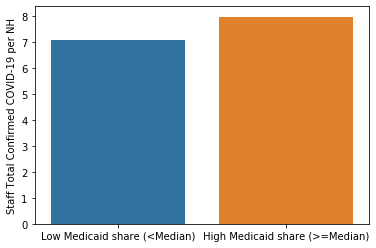

In [134]:
ax=sns.barplot(x=["Low Medicaid share (<Median)", "High Medicaid share (>=Median)"],y=[df[df["Low Medicaid share (<Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["High Medicaid share (>=Median)"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 per NH")

In [135]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["Low Medicaid share (<Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["High Medicaid share (>=Median)"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.0527467063368019
Confidence Interval:(6.916370938273685, 8.151928216013353)
P-Value:0.8183509195638494


#### INFERENCE: The p value is quite high because of which we can accept the null hypothesis and conclude that the values are quite close to expected values. 95% CI is also quite narrow.

#### Graphically it is clear that higher the share of Medicaid, bigger is the size of the outbreak

### DEATHS: RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 Deaths per NH')]

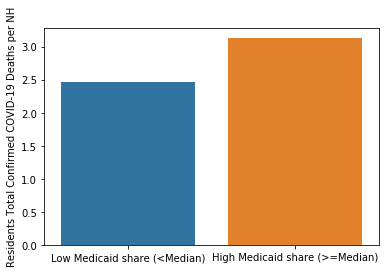

In [136]:
ax=sns.barplot(x=["Low Medicaid share (<Median)", "High Medicaid share (>=Median)"],y=[df[df["Low Medicaid share (<Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["High Medicaid share (>=Median)"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 Deaths per NH")

In [137]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array(([df[df["Low Medicaid share (<Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["High Medicaid share (>=Median)"].sum()]))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.07928500202665456
Confidence Interval:(2.331451524250933, 3.2536957129385167)
P-Value:0.7782687019507034


#### INFERENCE: The p value is quite high because of which we can accept the null hypothesis and conclude that the values are quite close to expected values. 95% CI is also quite narrow.

#### Graphically it is clear that higher the share of Medicaid, bigger is the size of the outbreak

### DEATHS: STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 Deaths per NH')]

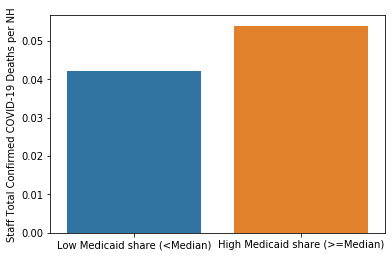

In [138]:
ax=sns.barplot(x=["Low Medicaid share (<Median)", "High Medicaid share (>=Median)"],y=[df[df["Low Medicaid share (<Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["High Medicaid share (>=Median)"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 Deaths per NH")

In [139]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["Low Medicaid share (<Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["Low Medicaid share (<Median)"].sum(),df[df["High Medicaid share (>=Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["High Medicaid share (>=Median)"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.0014424157357521344
Confidence Interval:(0.039900466750120225, 0.056219118034698104)
P-Value:0.9697043069612766


#### INFERENCE: The p value is quite high because of which we can accept the null hypothesis and conclude that the values are quite close to expected values. 95% CI is also quite narrow.

#### Graphically it is clear that higher the share of Medicaid, bigger is the size of the outbreak

### 2.RACIAL AND ETHNIC MINORITY

### CASES: RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 per NH')]

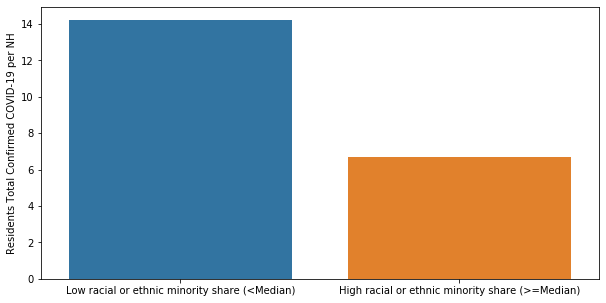

In [140]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Low racial or ethnic minority share (<Median)", "High racial or ethnic minority share (>=Median)"],y=[df[df["Low racial or ethnic minority share (<Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 per NH")

In [141]:
#CHI SQUARED TEST FOR RESIDENTS
Res=np.array(([df[df["Low racial or ethnic minority share (<Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Residents Total Confirmed COVID-19"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()]))
mean=np.mean(Res)
sigma=np.std(Res)
chisq,p=stats.chisquare(Res)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Res)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 2.7143574581970755
Confidence Interval:(5.235169256357052, 15.676663765812448)
P-Value:0.09944900820931728


#### INFERENCE: The p-value of the data is small but significant enough for us to accept the null hypothesis. The values are close to the expected values and this is also visible in a somewhat narrow 95% CI

#### Graphically, the trend is very clear. The outbreak is bigger in the NHs where there is Low ethnic or racial minority

### CASES: STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 per NH')]

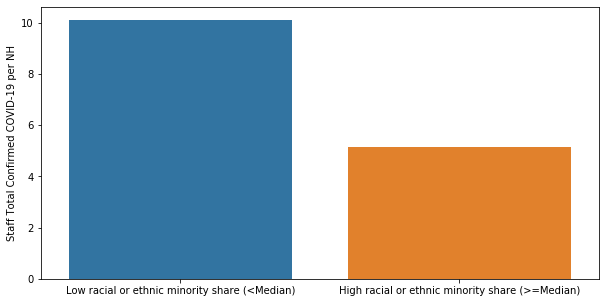

In [142]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Low racial or ethnic minority share (<Median)", "High racial or ethnic minority share (>=Median)"],y=[df[df["Low racial or ethnic minority share (<Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 per NH")

In [143]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["Low racial or ethnic minority share (<Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Staff Total Confirmed COVID-19"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 1.6046110759749372
Confidence Interval:(4.206209853941894, 11.06718356648443)
P-Value:0.20525097621445282


#### INFERENCE: The p-value of the data is small but significant enough for us to accept the null hypothesis. The values are close to the expected values and this is also visible in a somewhat narrow 95% CI

#### Graphically, the trend is very clear. The outbreak is bigger in the NHs where there is Low ethnic or racial minority

### DEATHS: RESIDENTS

[Text(0, 0.5, 'Residents Total Confirmed COVID-19 Deaths per NH')]

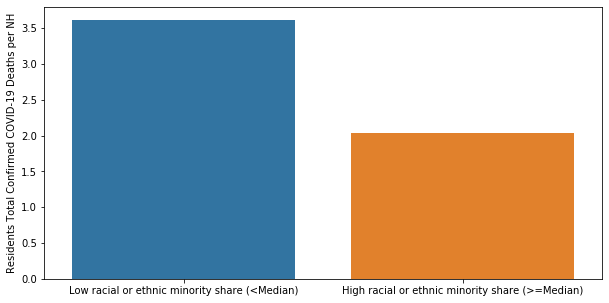

In [144]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Low racial or ethnic minority share (<Median)", "High racial or ethnic minority share (>=Median)"],y=[df[df["Low racial or ethnic minority share (<Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()])
ax.set(ylabel="Residents Total Confirmed COVID-19 Deaths per NH")

In [145]:
#CHI SQUARED TEST FOR Residents
Hcw=np.array(([df[df["Low racial or ethnic minority share (<Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Residents Total COVID-19 Deaths"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.4413792609277186
Confidence Interval:(1.7296660920574896, 3.917749850546964)
P-Value:0.506457495045586


#### INFERENCE: The p value is quite high because of which we can accept the null hypothesis and conclude that the values are quite close to expected values. 95% CI is also quite narrow.

#### Graphically it is clear that lower the racial or ethnic share, bigger is the size of the outbreak

### DEATHS: STAFF

[Text(0, 0.5, 'Staff Total Confirmed COVID-19 Deaths per NH')]

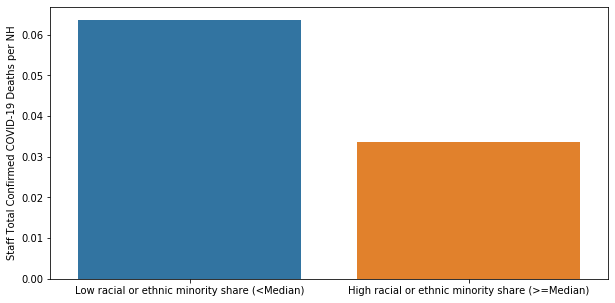

In [146]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=["Low racial or ethnic minority share (<Median)", "High racial or ethnic minority share (>=Median)"],y=[df[df["Low racial or ethnic minority share (<Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()])
ax.set(ylabel="Staff Total Confirmed COVID-19 Deaths per NH")

In [147]:
#CHI SQUARED TEST FOR Staff
Hcw=np.array(([df[df["Low racial or ethnic minority share (<Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["Low racial or ethnic minority share (<Median)"].sum(),df[df["High racial or ethnic minority share (>=Median)"]==1]["Staff Total COVID-19 Deaths"].sum()/df["High racial or ethnic minority share (>=Median)"].sum()]))
mean=np.mean(Hcw)
sigma=np.std(Hcw)
chisq,p=stats.chisquare(Hcw)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(Hcw)))
print("Chi-Square: "+str(chisq))
print("Confidence Interval:" + str(conf_int))
print("P-Value:" + str(p))

Chi-Square: 0.009192008082866819
Confidence Interval:(0.0279287726258352, 0.06937719802035794)
P-Value:0.9236198814443544


#### INFERENCE: The p value is quite high because of which we can accept the null hypothesis and conclude that the values are quite close to expected values. 95% CI is also quite narrow.

#### Graphically it is clear that lower the racial or ethnic share, bigger is the size of the outbreak

### QUESTION 9

In [148]:
df_COUNTY.columns

Index(['Zip', 'County Code', 'County Infections per 100K',
       'County Deaths per 100K', 'County Infections per 100K below Median',
       'County Infections per 100K Median or higher',
       'County Deaths per 100K below Median',
       'County Deaths per 100K Median or higher', 'Rural area', 'Urban area'],
      dtype='object')

In [149]:
df_CONTINUOUS.columns

Index(['Federal Provider Number',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Overall Rating', 'Ownership Type',
       'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths',
       'Number of All Beds', 'Total Number of Occupied Beds',
       'Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths',
       'paymcaid', 'pctwhite_2011p'],
      dtype='object')

In [150]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [151]:
df_A=df_NH[['Federal Provider Number', 'Provider Zip Code']]
df_A.columns=['Federal Provider Number', 'Zip']
df_B=df_COUNTY[['Zip', 'County Code']]

In [152]:
df_temp=df_A.merge(df_B, on='Zip', how='inner')

In [153]:
df_C=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Staff Total Confirmed COVID-19']]

In [154]:
df=df_temp.merge(df_C, on='Federal Provider Number',how='inner')

In [155]:
df.head()

,Federal Provider Number,Zip,County Code,Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19
0,365333,43402,39173,0,1
1,365458,43402,39173,0,0
2,366401,43402,39173,0,0
3,315254,7093,34017,3,2
4,495309,23509,51710,2,6


In [156]:
df.drop(columns=["Zip"],inplace=True)

In [157]:
df.head()

,Federal Provider Number,County Code,Residents Total Confirmed COVID-19,Staff Total Confirmed COVID-19
0,365333,39173,0,1
1,365458,39173,0,0
2,366401,39173,0,0
3,315254,34017,3,2
4,495309,51710,2,6


In [158]:
df.groupby('County Code')['Federal Provider Number'].count()

County Code
1001     5
1003     7
1005     1
1007     3
1009     7
        ..
56037    1
56039    1
56041    1
56043    1
56045    2
Name: Federal Provider Number, Length: 2934, dtype: int64

### RESIDENTS

In [159]:
df.groupby('County Code')['Residents Total Confirmed COVID-19'].sum()

County Code
1001     83
1003     95
1005     43
1007     33
1009     14
         ..
56037     0
56039     0
56041     0
56043    16
56045     1
Name: Residents Total Confirmed COVID-19, Length: 2934, dtype: int64

[Text(0.5, 0, 'Number of NHs per county')]

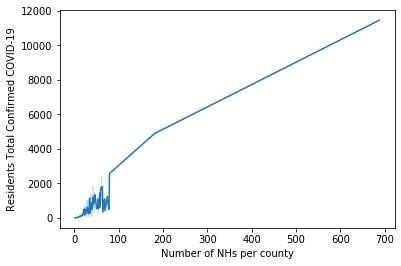

In [160]:
ax=sns.lineplot(x=df.groupby('County Code')['Federal Provider Number'].count(),y=df.groupby('County Code')['Residents Total Confirmed COVID-19'].sum())
ax.set(xlabel="Number of NHs per county")

#### INFERENCE: Very evidently , as the number of facilities in a county increases, the size of the outbreaak among the residents increases almost linearly as is visible in the graph

### HCW STAFF

[Text(0.5, 0, 'Number of NHs per county')]

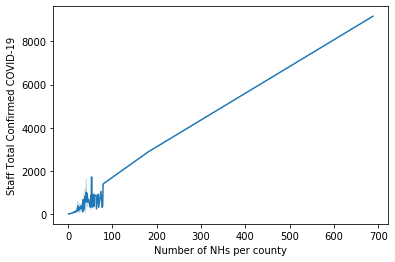

In [161]:
ax=sns.lineplot(x=df.groupby('County Code')['Federal Provider Number'].count(),y=df.groupby('County Code')['Staff Total Confirmed COVID-19'].sum())
ax.set(xlabel="Number of NHs per county")

#### INFERENCE: Very evidently , as the number of facilities in a county increases, the size of the outbreaak among the staff increases almost linearly as is visible in the graph

### QUESTION 10

In [162]:
df_NH.columns

Index(['Federal Provider Number', 'Provider Zip Code', 'Government',
       'Non profit', 'For profit', 'Young (<33% Percentile)',
       'Medium (33%-66% Percentile)', 'Old (>66% Percentile)',
       '4- or 5-Star Overall Rating', '3-Star Overall Rating',
       '1- or 2-Star Overall Rating',
       '0.75 RN staffing hours per resident day or higher',
       'Under 0.75 RN staffing hours per resident day ',
       '4.1 nurse staffing hours per resident day or higher',
       'Under 4.1 nurse staffing hours per resident day',
       'No federal deficiencies', 'Federal deficiencies',
       'Serious federal deficiencies',
       'No Confirmed COVID-19 Cases among residents',
       'Confirmed COVID-19 Cases among residents (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among residents (>=95% Percentile)',
       'No Confirmed COVID-19 Cases among staff',
       'Confirmed COVID-19 Cases among staff (1-<95% Percentile)',
       'Confirmed COVID-19 Cases among staff (>=95% Percent

In [163]:
df_COUNTY.columns

Index(['Zip', 'County Code', 'County Infections per 100K',
       'County Deaths per 100K', 'County Infections per 100K below Median',
       'County Infections per 100K Median or higher',
       'County Deaths per 100K below Median',
       'County Deaths per 100K Median or higher', 'Rural area', 'Urban area'],
      dtype='object')

In [164]:
df_CONTINUOUS.columns

Index(['Federal Provider Number',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Overall Rating', 'Ownership Type',
       'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths',
       'Number of All Beds', 'Total Number of Occupied Beds',
       'Staff Total Confirmed COVID-19', 'Staff Total COVID-19 Deaths',
       'paymcaid', 'pctwhite_2011p'],
      dtype='object')

In [165]:
df_A=df_A=df_NH[['Federal Provider Number', 'Provider Zip Code']]
df_A.columns=['Federal Provider Number', 'Zip']
df_B=df_COUNTY[['Zip', 'County Code','County Infections per 100K','County Deaths per 100K']]

In [166]:
df_temp=df_A.merge(df_B, on='Zip', how='inner')

In [167]:
df_C=df_CONTINUOUS[['Federal Provider Number','Residents Total Confirmed COVID-19','Residents Total COVID-19 Deaths']]
df=df_temp.merge(df_C, on='Federal Provider Number',how='inner')

In [168]:
df.head()

,Federal Provider Number,Zip,County Code,County Infections per 100K,County Deaths per 100K,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths
0,365333,43402,39173,453.0,41.0,0,0
1,365458,43402,39173,453.0,41.0,0,0
2,366401,43402,39173,453.0,41.0,0,0
3,315254,7093,34017,2863.0,222.0,3,0
4,495309,23509,51710,888.0,8.0,2,0


In [169]:
df.drop(columns=["Zip"],inplace=True)

In [170]:
df.head()

,Federal Provider Number,County Code,County Infections per 100K,County Deaths per 100K,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths
0,365333,39173,453.0,41.0,0,0
1,365458,39173,453.0,41.0,0,0
2,366401,39173,453.0,41.0,0,0
3,315254,34017,2863.0,222.0,3,0
4,495309,51710,888.0,8.0,2,0


In [171]:
temp=df.groupby("County Code")["Residents Total Confirmed COVID-19"].sum()

In [172]:
df[["County Code","County Infections per 100K"]].drop_duplicates()

,County Code,County Infections per 100K
0,39173,453.0
3,34017,2863.0
4,51710,888.0
5,54107,248.0
7,48241,259.0
...,...,...
19318,41023,14.0
19326,40067,333.0
19333,54093,102.0
19337,37153,892.0


In [173]:
df[["County Code","County Infections per 100K"]].drop_duplicates().merge(temp,on="County Code", how='inner')

,County Code,County Infections per 100K,Residents Total Confirmed COVID-19
0,39173,453.0,80
1,34017,2863.0,251
2,51710,888.0,101
3,54107,248.0,2
4,48241,259.0,31
...,...,...,...
2929,41023,14.0,0
2930,40067,333.0,0
2931,54093,102.0,0
2932,37153,892.0,0


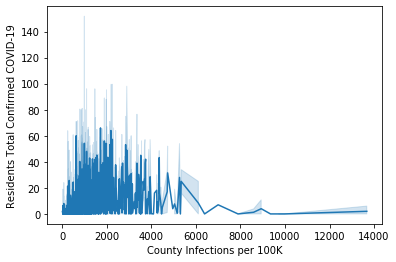

In [174]:
sns.lineplot(x=df['County Infections per 100K'],y=df['Residents Total Confirmed COVID-19'])

#### INFERENCE: The graph shows an obvious pattern when the County Infections per 100K residents increases initially. Both increase in a direct manner. An unclear trend of falling Residents Cases in NHs is seen at High County cases. This might be due to small number of observations and sample size or errors in the data.

In [175]:
temp=df.groupby("County Code")["Residents Total COVID-19 Deaths"].sum()

In [176]:
df[["County Code","County Deaths per 100K"]].drop_duplicates()

,County Code,County Deaths per 100K
0,39173,41.0
3,34017,222.0
4,51710,8.0
5,54107,4.0
7,48241,3.0
...,...,...
19318,41023,0.0
19326,40067,0.0
19333,54093,0.0
19337,37153,16.0


In [177]:
df[["County Code","County Deaths per 100K"]].drop_duplicates().merge(temp,on="County Code", how='inner')

,County Code,County Deaths per 100K,Residents Total COVID-19 Deaths
0,39173,41.0,31
1,34017,222.0,71
2,51710,8.0,6
3,54107,4.0,0
4,48241,3.0,1
...,...,...,...
2929,41023,0.0,0
2930,40067,0.0,0
2931,54093,0.0,0
2932,37153,16.0,0


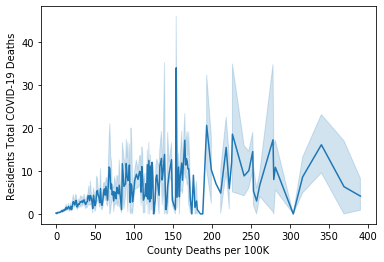

In [178]:
sns.lineplot(x=df['County Deaths per 100K'],y=df['Residents Total COVID-19 Deaths'])

#### INFERENCE: The graph shows an obvious pattern when the County Deaths per 100K residents increases initially. Both increase in a direct manner. An unclear trend of falling and sudden rising of  Residents Deaths in NHs is seen at High County cases. This might be due to small number of observations and sample size or errors in the data.

In [179]:
!jupyter nbconvert --to html Project_version_2.ipynb

[NbConvertApp] Converting notebook Project_version_2.ipynb to html
[NbConvertApp] Writing 1308471 bytes to Project_version_2.html
